#                                    EDA on Algerian_forest_fires_dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df=pd.read_csv("C:\\Users\\sonal\\Downloads\\Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,0.0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,0.0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0.0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0.0


In [4]:
#1
df.shape

(247, 15)

Rows are 247 and columns are 15 in our dataset

                                        DATA CLEANING

Observation: In our dataset
1. From index 0-121 we have Bejaia Region
2. From index 122-124 we have irrelevant rows so we need to drop it
3. From index 125 onwards we have Sidi-Bel Abbes Region

Lets drop the unecessary rows

In [6]:
#pd.set_option('display.max_rows', None) #displays all the rows of dataset

In [7]:
df.drop(index=[122,123,124],inplace=True) #to drop unwanted rows
df.reset_index(drop=True,inplace=True) #Resetting indexes after deleting rows
df['Region']=0

for i in range(len(df)):
    if i < 122:
        df['Region'][i]=0
    else:
        df['Region'][i]=1

In [8]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [9]:
#2. 
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

Observation: Column name has some extra space lets remove it.

In [10]:
for i in df.columns:
    df.rename(columns={i:i.strip()},inplace=True)
    
print(df.columns)

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')


In [11]:
#Finding out Null data in dataset
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [12]:
df['Classes']

0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
239         fire   
240     not fire   
241     not fire   
242     not fire   
243    not fire    
Name: Classes, Length: 244, dtype: object

In [13]:
df['Classes'][165]

nan

As we can see that one null value is present in classes column and at row 165. Now lets checkout the whole row to find out the issue

In [14]:
df.iloc[165]

day                 14
month                7
year              2012
Temperature         37
RH                  37
Ws                  18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
Region               1
Name: 165, dtype: object

From above observation we see that the values have been shifted to left from "DC" so we need to shift it back to their origional places

In [15]:
#Correcting the entries at roq 165 and shifting it to right
df.at[165, 'DC']= 14.6
df.at[165, 'ISI']= 9
df.at[165, 'BUI']= 12.5
df.at[165, 'FWI']= 10.4
df.at[165, 'Classes']= 'fire'

In [16]:
df.iloc[165]

day              14
month             7
year           2012
Temperature      37
RH               37
Ws               18
Rain            0.2
FFMC           88.9
DMC            12.9
DC             14.6
ISI               9
BUI            12.5
FWI            10.4
Classes        fire
Region            1
Name: 165, dtype: object

In [17]:
#Lets check again for Null values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [18]:
#Now the data is proper
#Lets find out unique values

Checking for missing values

In [19]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [20]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [21]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [22]:
#We can see that there are extra spaces in the entries that we need to remove
df['Classes']= [i.strip() for i in df['Classes']]

In [23]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

#Extra spaces has been removed

In [24]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


Observation:
    The entries of "year" column are same throughout and doesnot have any impact on dataset
    
    Column "day"also can be removed
    

In [25]:
#Deleting unwanted columns
df.drop(columns= ['year','day'], inplace= True)

In [26]:
df.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,6,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,6,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,6,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,6,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [27]:
##Lets check the data types of columns
df.dtypes

month          object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int64
dtype: object

From our observation we see that columns month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI are having Catagorical data which needs to be Numerical.

and Region is Numerical and it should be Catagorical

Lets check the datatypes as well

We need to change the datatypes

In [28]:
##Converting datatypes of columns
col=['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']
df[col]=df[col].apply(pd.to_numeric)

df['Region']=df['Region'].apply(str)

In [29]:
#Lets check again
df.dtypes

month           object
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region          object
dtype: object

In [30]:
# Lets check for duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool

Observation:
    No duplicate data available

# Statistical Information

In [31]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288115,47.619662,6.9,13.275,33.10,68.150,220.4
ISI,244.0,4.759836,4.154628,0.0,1.400,3.50,7.300,19.0
BUI,244.0,16.673361,14.201648,1.1,6.000,12.45,22.525,68.0
FWI,244.0,7.049180,7.428366,0.0,0.700,4.45,11.375,31.1


In [33]:
#Lets check the Catagorical and Numerical column data in our dataset
cat_col=[fea for fea in df.columns if df[fea].dtype == 'O'] #catagorical data
num_col=[fea for fea in df.columns if df[fea].dtype != 'O']  #numarical data

In [34]:
df[cat_col].head()

,month,Classes,Region
0,6,not fire,0
1,6,not fire,0
2,6,not fire,0
3,6,not fire,0
4,6,not fire,0


In [35]:
df[num_col].head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


# Univariate Data Visualizations

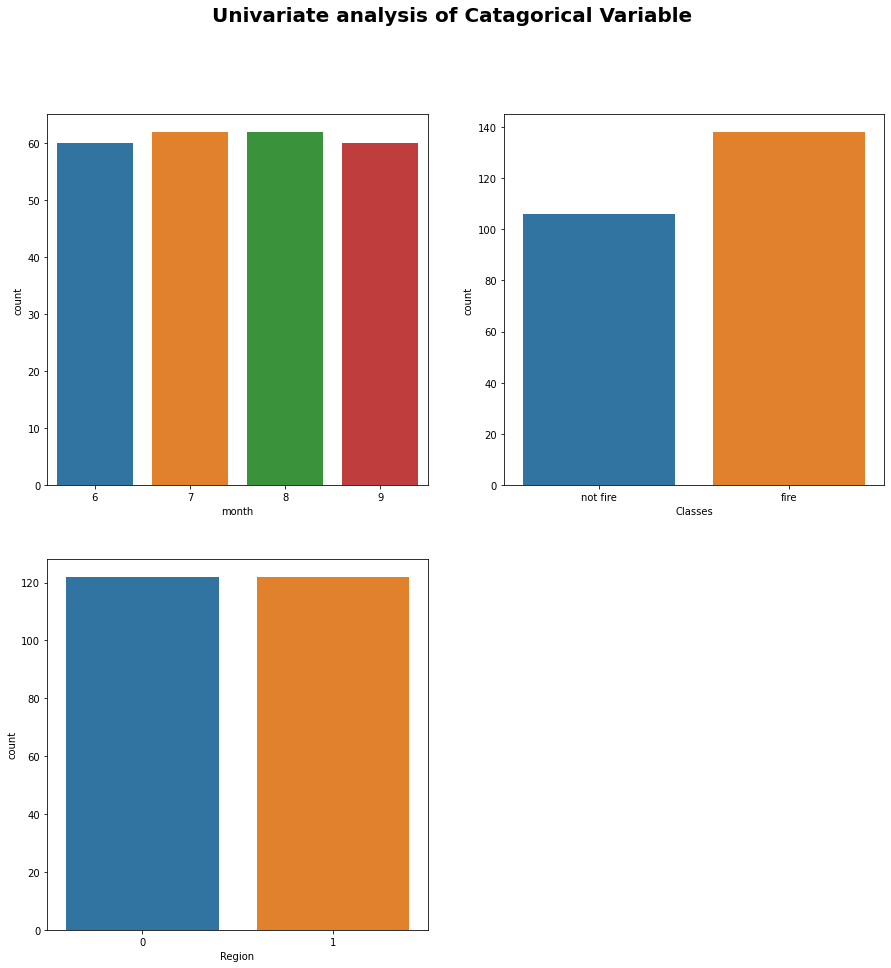

In [36]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate analysis of Catagorical Variable', fontsize=20, fontweight='bold')
cat_col=[fea for fea in df.columns if df[fea].dtype == 'O']

for i in range (0, len(cat_col)):
    plt.subplot(2,2,i+1)
    sns.countplot(df[cat_col[i]])
    plt.xlabel(cat_col[i])


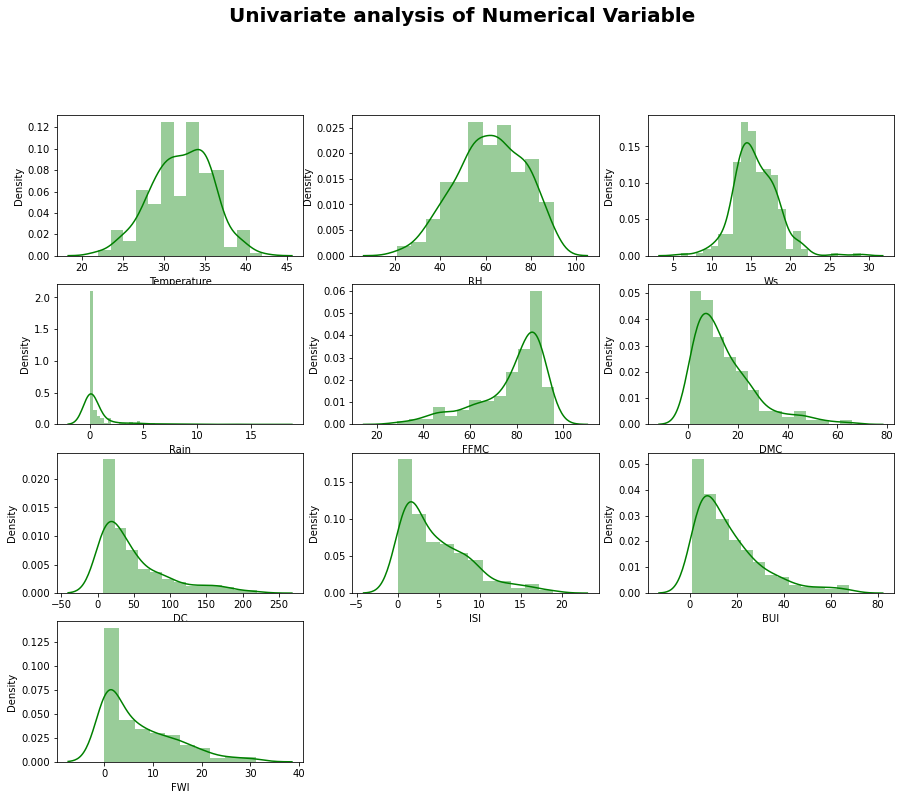

In [37]:
#Univariate Analysis on Numerical feature
plt.figure(figsize=(15,15))
plt.suptitle('Univariate analysis of Numerical Variable', fontsize=20, fontweight='bold')

for i in range (0, len(num_col)):
    plt.subplot(5,3,i+1)
    sns.distplot(df[num_col[i]], color='g')
    plt.xlabel(num_col[i])

Observation:
1) Column Temperature,RS,WS are Normally distributed
2) Rain column has maximum outliers
3) FFMC is Right Skewed
4) DMC,DC,ISI,BUI,FWI are Left Skewed

# Multivariate analysis
Multivariate analysis is the analysis of more than one variable.
Checking for multicolinearity


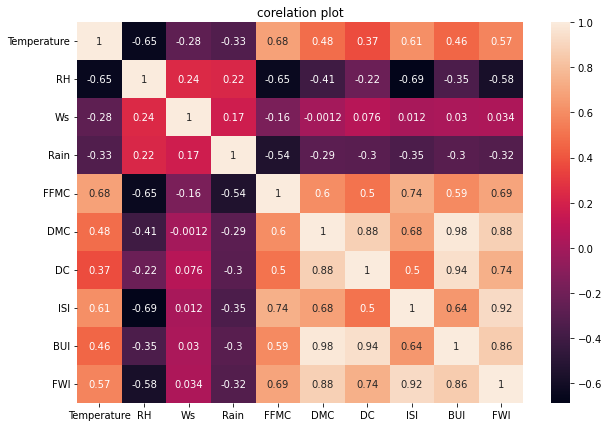

In [38]:
plt.figure(figsize=(10,7))
plt.title('corelation plot')
sns.heatmap(df[num_col].corr(), annot=True)
plt.show()

Observation:
'BUI' is very highly corelated with 'DMC' and 'DC'
'DC' is corelated with 'BUI'
'ISI' is very highly corelated with 'FWI'
'FWI' is very highly corelated with 'BUI'
'DC' and 'DMC' are highly corelated

Plotting box plots of all variables in one frame :

Since the box plot is for continuous variables, firstly create a data frame without the column ‘Classes’. Then drop the column from the DataFrame using the drop( ) function and specify axis=1 to indicate it.

Removing column with catagorical variable that is "Classes"

In [39]:
df1=df.drop("Classes",axis=1)
df1.columns

Index(['month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Region'],
      dtype='object')

Now lets check the relationship between the other features with "Classes" through plots

In [40]:
#Lets check the Catagorical and Numerical column data in our new dataset df1 and find out some important information saperately
cat_df1=[fea for fea in df1.columns if df1[fea].dtype == 'O'] #catagorical data
num_df1=[fea for fea in df1.columns if df1[fea].dtype != 'O']  #numarical data

In [41]:
cat_df1

['month', 'Region']

In [42]:
num_df1

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

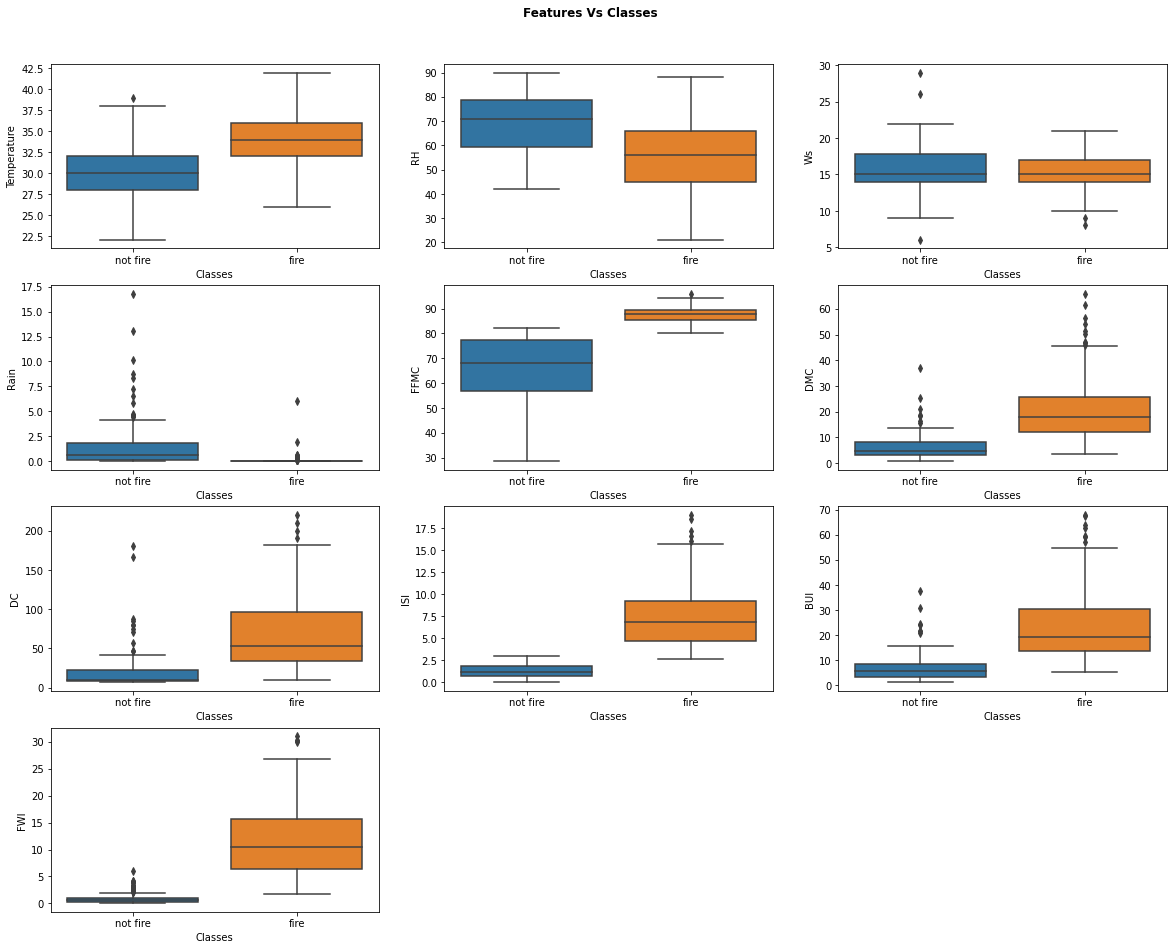

In [43]:
plt.figure(figsize=(20,40))
plt.suptitle("Features Vs Classes",fontweight='bold',y=0.9)
for i in range(0, len(num_df1)):
    ax = plt.subplot(10, 3, i+1)
    sns.boxplot(data = df, x = 'Classes', y = df[num_df1[i]])


<AxesSubplot:>

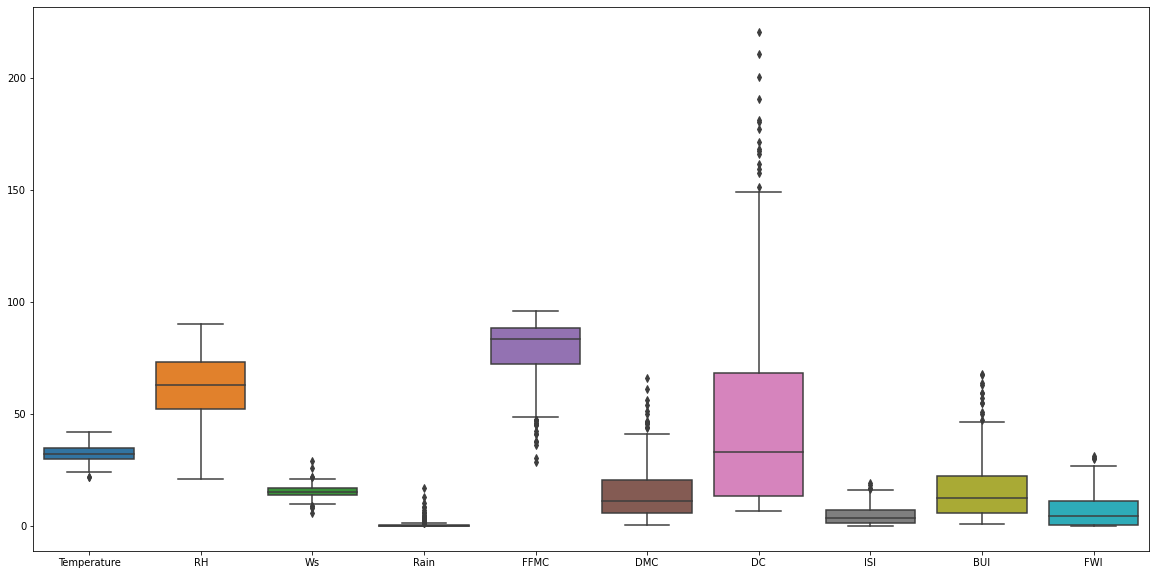

In [44]:
#OR
plt.figure(figsize=(20,10))
sns.boxplot(data = df, orient='v')

<AxesSubplot:title={'center':'Bar graph showing the incident of fire in various Temperature'}, xlabel='Temperature', ylabel='count'>

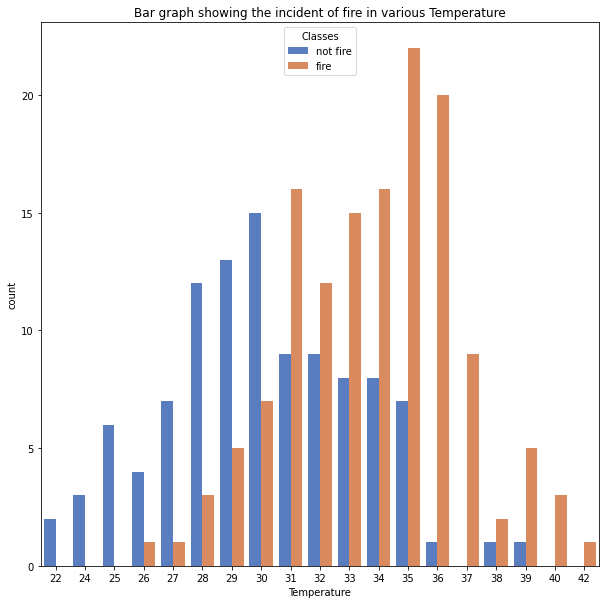

In [45]:
# Checking for Temperature column for impact on fire 
plt.figure(figsize=(10,10))
plt.title('Bar graph showing the incident of fire in various Temperature')
sns.countplot(data= df, hue = 'Classes', x= 'Temperature', palette = "muted")

<AxesSubplot:title={'center':'Bar graph showing the incident of fire in various region'}, xlabel='Region', ylabel='count'>

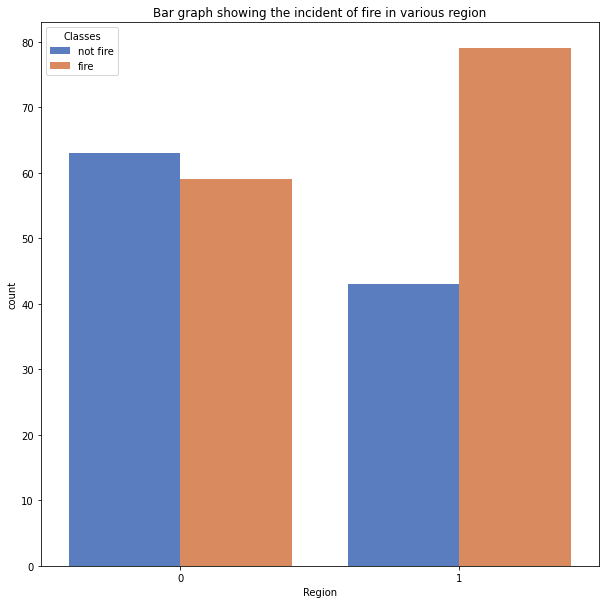

In [46]:
# Checking for region column for impact on fire 
plt.figure(figsize=(10,10))
plt.title('Bar graph showing the incident of fire in various region')
sns.countplot(data= df, hue = 'Classes', x= 'Region', palette = "muted")

<AxesSubplot:title={'center':'Bar graph showing realtion between fire and wind speed'}, xlabel='Ws', ylabel='count'>

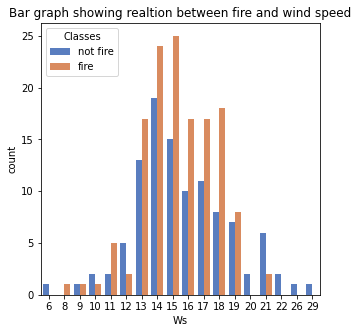

In [47]:
# Checking for Wind speed column for impact on fire 
plt.figure(figsize=(5,5))
plt.title('Bar graph showing realtion between fire and wind speed')
sns.countplot(data= df, hue = 'Classes', x= 'Ws', palette = "muted")

We can see Fire occurance when wind speed is bet 8 to 21 so initially if we conclude that fire increases as wind speed increases but we can see that after 21 there is no fire so this contradicts each other thats why wind has no impact on fire.

<AxesSubplot:title={'center':'Bar graph showing realtion between fire and wind speed'}, xlabel='Rain', ylabel='count'>

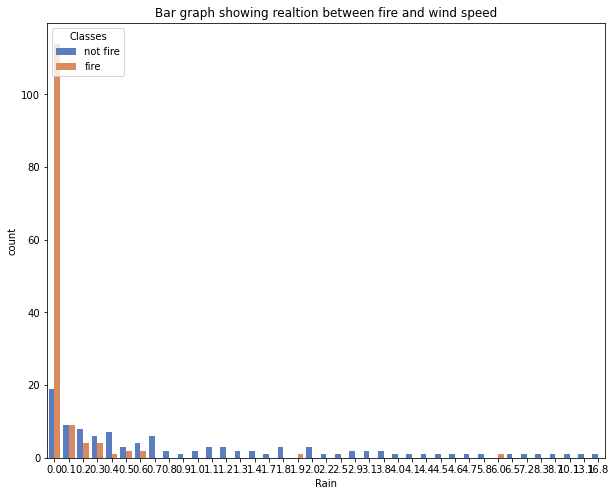

In [48]:
# Checking for Rain column for impact on fire 
plt.figure(figsize=(10,8))
plt.title('Bar graph showing realtion between fire and wind speed')
sns.countplot(data= df, hue = 'Classes', x= 'Rain', palette = "muted")

<AxesSubplot:title={'center':'Bar graph showing realtion between fire and month'}, xlabel='month', ylabel='count'>

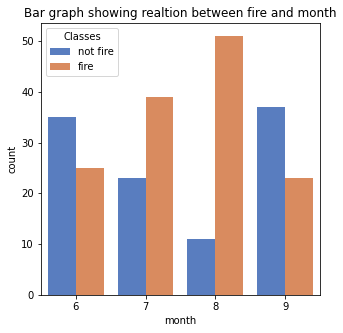

In [49]:
# Checking the month in which the fire occurance is more
plt.figure(figsize=(5,5))
plt.title('Bar graph showing realtion between fire and month')
sns.countplot(data= df, hue = 'Classes', x= 'month', palette = "muted")

Final Conclusion

1. If temperature increses above 26 degrees there are more fire chances

2. We can see Fire occurance when wind speed is bet 8 to 21 so initially if we conclude that fire increases as wind speed increases but we can see that after 21 there is no fire so this contradicts each other thats why wind has no impact on fire.

3. If Rain increases Fire decreases

4. There is more Fire in Sidi-Bel Abbes Region and chances of Fire are high in July and August

# Simple Linear Regression

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
df.keys()

Index(['month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

Consider temperature as our target variable. 

<AxesSubplot:xlabel='Temperature'>

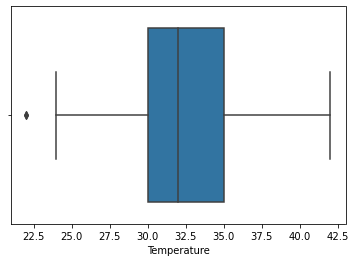

In [52]:
#outlier
sns.boxplot(df['Temperature'])

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

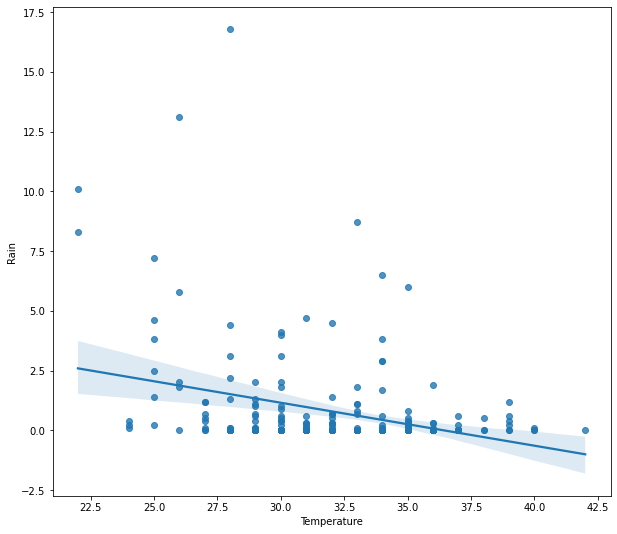

In [53]:
##Ridge Regression
plt.figure(figsize=(10,9))
sns.regplot(x="Temperature",y="Rain",data=df)

<AxesSubplot:xlabel='Temperature', ylabel='ISI'>

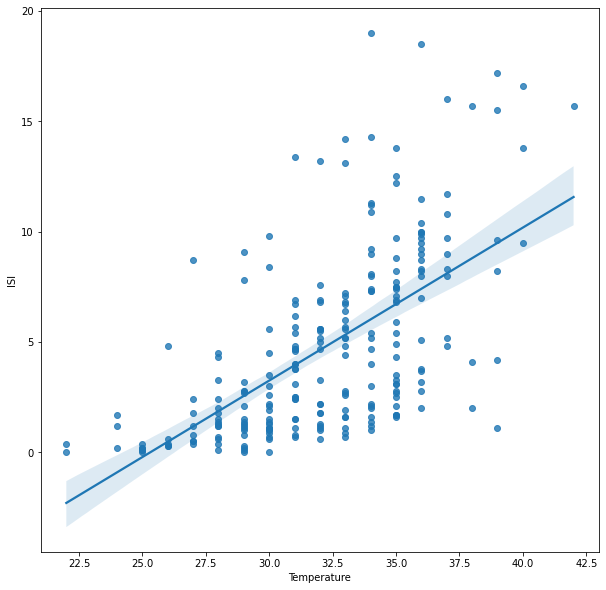

In [54]:
plt.figure(figsize=(10,10))
sns.regplot(x="Temperature",y="ISI",data=df)

In [55]:
#we can see the bestfit line and the shaded region are Ridge and Lasso

Independent and Dependent feature

In [56]:
df.columns

Index(['month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [57]:
#Independent feature: 
X=pd.DataFrame(df,columns=['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Region'])

#Dependent variable: Target feature is Temperature
Y=pd.DataFrame(df,columns=['Temperature'])

#month can be removed as its not required for now


In [58]:
X.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [59]:
Y.head()

,Temperature
0,29
1,29
2,26
3,25
4,27


# Train-Test data

In [60]:
df.shape

(244, 13)

In [61]:
from sklearn.model_selection import train_test_split #test data is used to validate data
X_train,X_test,Y_train,Y_test=train_test_split(
X,Y,test_size=0.33,random_state=10)

In [62]:
Y_train.shape

(163, 1)

In [63]:
X_train.shape

(163, 10)

In [64]:
Y_test.shape

(81, 1)

In [65]:
X_test.shape

(81, 10)

In [66]:
#163+81=244 rows

# Standardize or feature scaling

In [67]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [68]:
scaler

StandardScaler()

In [69]:
X_train=scaler.fit_transform(X_train)  #fit_transform=take and change the data

In [70]:
X_test=scaler.transform(X_test)

In [71]:
X_train

array([[-0.85631108, -3.36419461,  0.88853946, ..., -0.32636097,
        -0.86597829,  0.98176139],
       [-0.52508491,  0.99944243, -0.441414  , ...,  0.76499972,
         1.21371864, -1.01857744],
       [ 0.13736742,  0.99944243, -0.441414  , ...,  0.35224151,
         0.48516239, -1.01857744],
       ...,
       [-0.72382061, -0.81873967, -0.441414  , ...,  0.08639724,
         0.37919057,  0.98176139],
       [ 0.13736742, -0.45510325, -0.441414  , ..., -0.76710278,
        -0.78649943,  0.98176139],
       [ 1.13104591, -1.18237609, -0.441414  , ..., -0.27738965,
        -0.7997459 , -1.01857744]])

In [72]:
X_test

array([[-3.92594448e-01, -9.14668296e-02,  1.48701853e+00,
        -1.82411230e-01, -6.02677495e-01, -8.21325921e-01,
        -7.33709998e-01, -6.83151962e-01, -8.12992382e-01,
         9.81761387e-01],
       [ 1.37367416e-01,  6.35806011e-01, -4.41414004e-01,
         6.64566895e-01,  1.37979749e+00,  2.03374779e+00,
         5.03148781e-01,  1.72343828e+00,  1.16073273e+00,
        -1.01857744e+00],
       [-1.12129201e+00, -4.55103250e-01, -4.41414004e-01,
         9.08075201e-02, -7.86536062e-01, -8.06652268e-01,
        -6.38567015e-01, -8.30065901e-01, -7.99745905e-01,
        -1.01857744e+00],
       [ 7.11221826e-02, -4.55103250e-01, -2.41920984e-01,
        -5.94627923e-02, -7.14591405e-01, -8.10844740e-01,
        -7.09924252e-01, -7.74098686e-01, -8.12992382e-01,
        -1.01857744e+00],
       [-1.93858749e-01,  6.35806011e-01, -4.41414004e-01,
         6.78227832e-01,  1.28490116e-02,  1.74386276e-01,
         5.26934527e-01,  9.33931438e-02,  3.92437047e-01,
        -1.

# Model Training

In [73]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression

LinearRegression()

In [74]:
regression.fit(X_train,Y_train)  #fit=we are finding parameters X_train is independent feature and Y_train is dependent

LinearRegression()

In [75]:
#print the co-efficients and the intercepts
print(regression.coef_)

[[-1.1894053  -0.52898776 -0.25118608  1.04392398 -0.29452097  0.79642928
  -0.02843277 -0.28406498  0.36267227  0.28769993]]


In [76]:
print(regression.intercept_)  #if all the independent features are 0 then price of the house as per model is 32

[32.17791411]


In [77]:
##Prediction for the test data
reg_pred=regression.predict(X_test)
reg_pred

array([[31.85520805],
       [33.32023288],
       [33.21807046],
       [31.54962426],
       [32.83392397],
       [34.84042006],
       [33.80989281],
       [34.26949295],
       [31.81859967],
       [32.79240656],
       [33.76738688],
       [27.66324428],
       [35.38696287],
       [29.66313126],
       [31.88093798],
       [32.11785121],
       [34.18507382],
       [28.01661619],
       [36.079289  ],
       [34.34726558],
       [32.59530447],
       [34.70784276],
       [33.52976523],
       [32.9881793 ],
       [35.84879978],
       [29.16181646],
       [32.31092863],
       [32.73296243],
       [27.54582691],
       [32.162335  ],
       [25.91964205],
       [27.35561207],
       [33.74009217],
       [32.08124527],
       [32.83052364],
       [31.011581  ],
       [28.94458723],
       [32.74881628],
       [27.70426299],
       [35.38114518],
       [32.75643987],
       [34.10208364],
       [33.96589922],
       [31.57457004],
       [36.52970822],
       [33

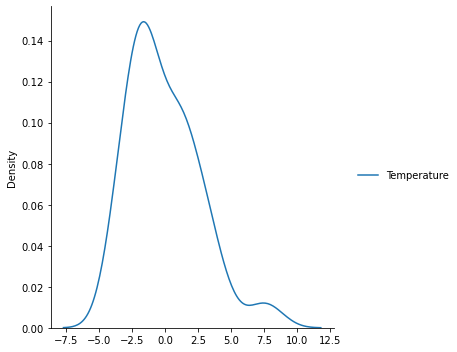

In [78]:
import seaborn as sns
sns.displot(reg_pred-Y_test,kind='kde')

# Assumptions of Linear Regression

Text(0, 0.5, 'Test Predicted Data')

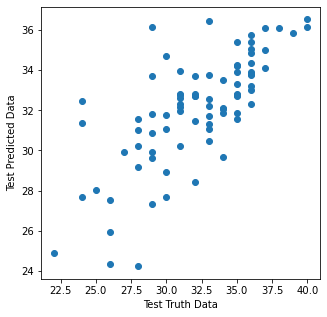

In [79]:
#relation bet truth point and predicted point
plt.figure(figsize=(5,5))
plt.scatter(Y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

# Residuals

In [80]:
## Residuels=errors
residuals=Y_test-reg_pred
residuals

,Temperature
162,2.144792
60,1.679767
61,2.781930
63,3.450376
69,2.166076
...,...
169,0.458262
232,-7.142238
144,1.281235
208,-3.444466


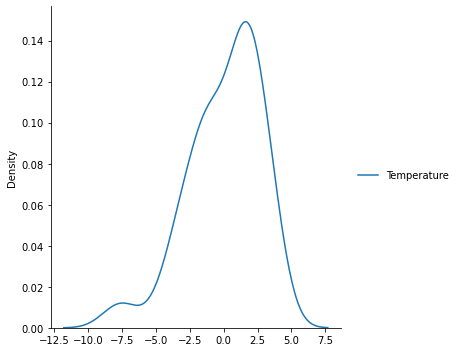

In [81]:
sns.displot(residuals,kind="kde")

We have outliers on Left side as its Left skewed and its approx normally distributed

# Scatter plot with predictions and residuels

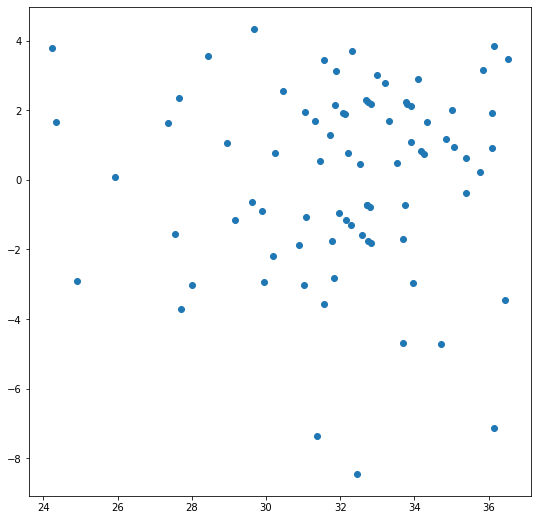

In [82]:
##Uniform Distribution
plt.figure(figsize=(9,9))
plt.scatter(reg_pred,residuals)

It does not have any perticular shape so this model is a bad model
#Homosedacity

# Performance Metrix

In [83]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,reg_pred))
print(mean_absolute_error(Y_test,reg_pred))
print(np.sqrt(mean_squared_error(Y_test,reg_pred)))

7.143465572113116
2.182733343742494
2.672726243391402


# R square and adjusted R square

In [84]:
##R square and adjusted R square
from sklearn.metrics import r2_score
score=r2_score(Y_test,reg_pred)
print(score)

0.527623237531152


In [85]:
##Adjusted R square

1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.46014084289274526

# Ridge Regression Algorithm

In [86]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha = 1)
ridge.fit(X_train,Y_train)

Ridge(alpha=1)

In [87]:
#print the co-efficients and the intercepts
print(ridge.coef_)

[[-1.18128511 -0.52862917 -0.25338075  1.02428349 -0.31526923  0.71277554
   0.04021199 -0.12974761  0.26387856  0.27825681]]


In [88]:
print(ridge.intercept_)

[32.17791411]


In [89]:
##Prediction for the test data
ridge_pred=ridge.predict(X_test)

In [90]:
ridge_pred

array([[31.848778  ],
       [33.30617413],
       [33.20848669],
       [31.55614175],
       [32.82680289],
       [34.82048931],
       [33.76534956],
       [34.1985969 ],
       [31.82091066],
       [32.79016762],
       [33.76425293],
       [27.67268602],
       [35.36088538],
       [29.64001932],
       [31.87642562],
       [32.11913244],
       [34.15895855],
       [28.03387827],
       [36.09670685],
       [34.36300079],
       [32.58971075],
       [34.61731153],
       [33.52136283],
       [32.99042509],
       [35.87194784],
       [29.17868097],
       [32.26521899],
       [32.74322302],
       [27.56672317],
       [32.17126894],
       [25.93574764],
       [27.35942807],
       [33.73488256],
       [32.07553167],
       [32.82019645],
       [30.98636133],
       [28.94458482],
       [32.72641426],
       [27.7179228 ],
       [35.34398646],
       [32.72783516],
       [34.10577155],
       [33.98602329],
       [31.548194  ],
       [36.50598562],
       [33

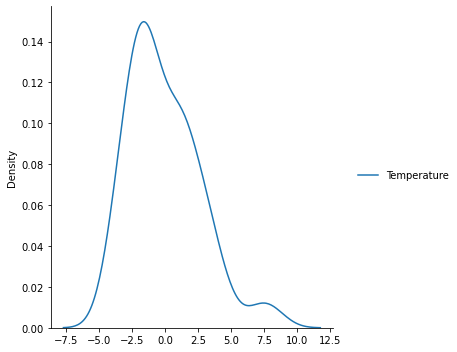

In [91]:
import seaborn as sns
sns.displot(ridge_pred-Y_test,kind='kde')

We have outliers on Right side as its Right skewed and its approx normally distributed

# Assumptions of Ridge Regression

Text(0, 0.5, 'Test Predicted Data')

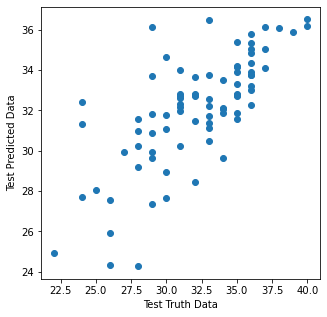

In [92]:
#relation bet truth point and predicted point
plt.figure(figsize=(5,5))
plt.scatter(Y_test,ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [93]:
## Residuels=errors
residual=Y_test-ridge_pred
residual

,Temperature
162,2.151222
60,1.693826
61,2.791513
63,3.443858
69,2.173197
...,...
169,0.436084
232,-7.148767
144,1.280860
208,-3.461637


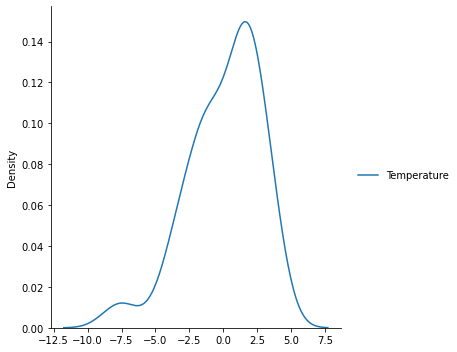

In [94]:
sns.displot(residual,kind="kde")

We have outliers on Left side as its Left skewed and its approx normally distributed

# Scatter plot with predictions and residuels

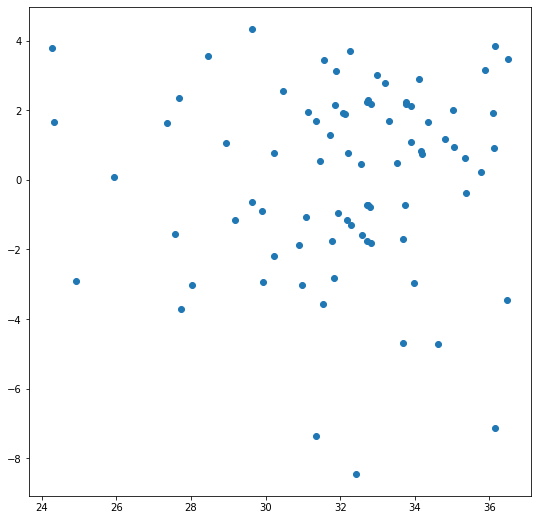

In [95]:
##Uniform Distribution
plt.figure(figsize=(9,9))
plt.scatter(ridge_pred,residuals)

It does not have any perticular shape so this model is a bad model #Homosedacity

# Performance Metrix

In [96]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,ridge_pred))
print(mean_absolute_error(Y_test,ridge_pred))
print(np.sqrt(mean_squared_error(Y_test,ridge_pred)))

7.123168367496653
2.1812779084350145
2.668926444752019


# R square and adjusted R square

In [97]:
##R square and adjusted R square
from sklearn.metrics import r2_score
score=r2_score(Y_test,ridge_pred)
print(score)

0.5289654330953502


In [98]:
##Adjusted R square

1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.46167478068040013

# Lasso Regression Algorithm

In [99]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1)
lasso.fit(X_train, Y_train)

Lasso(alpha=1)

In [100]:
#print the co-efficients and the intercepts
print(lasso.coef_)

[-0.71955751 -0.         -0.          0.89582004  0.          0.
  0.          0.          0.          0.        ]


In [101]:
print(lasso.intercept_)

[32.17791411]


In [102]:
##Prediction for the test data
lasso_pred=lasso.predict(X_test)

In [103]:
lasso_pred

array([32.29700076, 32.6744027 , 33.06609539, 32.07346965, 32.92497671,
       33.33947653, 33.32111992, 32.77042154, 32.11916885, 32.70983221,
       33.15976154, 30.29861247, 34.17172792, 30.95174825, 33.0931383 ,
       32.31497272, 32.93691477, 29.42489766, 34.46059856, 33.50695377,
       32.46152593, 33.02899752, 33.30888217, 32.80645043, 34.5498142 ,
       30.18680443, 32.38908351, 32.89121556, 29.47641605, 31.8492542 ,
       29.50217524, 28.6091198 , 33.21226395, 32.70054654, 32.64380834,
       31.80937418, 30.23515603, 32.53110125, 29.22810977, 33.62676377,
       32.55104126, 33.23190428, 33.93112391, 31.84411936, 34.06445535,
       33.20742879, 29.78847846, 33.80519505, 33.21966653, 30.53913152,
       31.62769114, 32.373594  , 33.92016988, 32.24993288, 31.51301599,
       31.26381066, 32.303719  , 34.28571873, 31.84095256, 33.47507571,
       32.27184094, 32.20868418, 31.42230192, 29.36272493, 32.24706577,
       34.47767146, 31.13749714, 31.41648274, 33.33947653, 33.04

# Assumption of Lasso Linear Regression

Text(0, 0.5, 'Test Predicted Data')

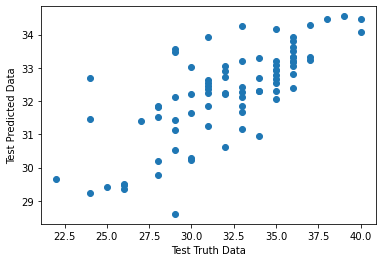

In [104]:
plt.scatter(Y_test, lasso_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [105]:
lasso_pred=lasso_pred.reshape(81,1)

In [106]:
residual=Y_test-lasso_pred

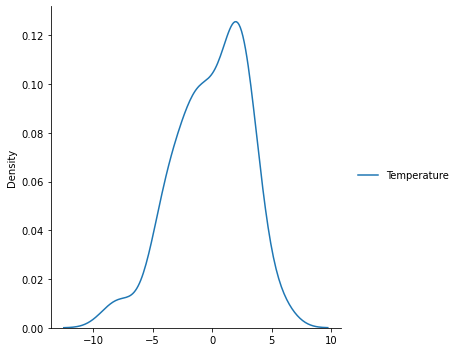

In [107]:
sns.displot(residual, kind='kde')

The graph is Left skewed and its approx normally distributed

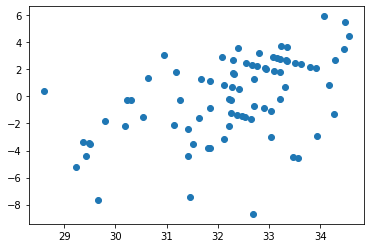

In [108]:
# Scatter plot with predictions and residual
# Uniform distribution

plt.scatter(lasso_pred, residual)



In [109]:
# performance Matrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test, lasso_pred))
print(mean_absolute_error(Y_test, lasso_pred))
print(np.sqrt(mean_squared_error(Y_test, lasso_pred)))

9.10609532182792
2.4978660766652734
3.0176307464346794


# R squared and Adjusted R squared

In [110]:
from sklearn.metrics import r2_score
score = r2_score(Y_test, lasso_pred)
print(score)

0.39784019626969913


In [111]:
## Adjusted R squared

1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.31181736716537045

# ElasticNet Regression Algorithm

In [112]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train, Y_train)

ElasticNet()

In [113]:
# prediction for test data

elastic_pred = elastic.predict(X_test)

# Assumptions of ElasticNet regression

Text(0, 0.5, 'Test Predicted Data')

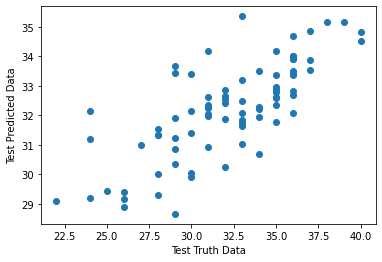

In [114]:
plt.scatter(Y_test, elastic_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [115]:
elastic_pred.shape

(81,)

In [116]:
elastic_pred=elastic_pred.reshape(81,1)

In [117]:
# residuals

residuals = Y_test - elastic_pred

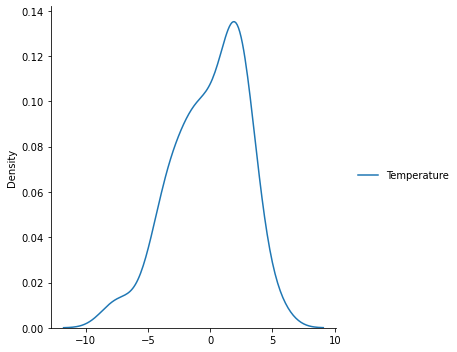

In [118]:
sns.displot(residuals, kind='kde')

Graph is Left Skewed and almost normally distributed

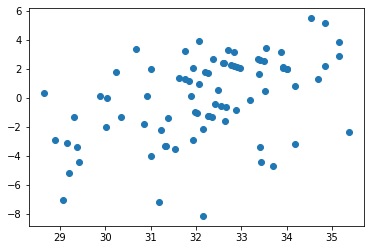

In [119]:
# Scatter plot with predictions and residual
# Uniform distribution

plt.scatter(elastic_pred, residuals)

Graph does not have any shape and its not uniform ,This model is a bad model

In [120]:
# performance Matrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test, elastic_pred))
print(mean_absolute_error(Y_test, elastic_pred))
print(np.sqrt(mean_squared_error(Y_test, elastic_pred)))

8.30362464529687
2.3892966420322015
2.881601055888353


# R squared and Adjusted R squared

In [121]:
from sklearn.metrics import r2_score
score = r2_score(Y_test, elastic_pred)
print(score)

0.4509052662037859


In [122]:
## Adjusted R squared

1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.3724631613757553